### 1. Make Graph

In [70]:
from ndmg import graph
import numpy as np
import nibabel as nb

labels = '../data/atlas/desikan_s4.nii.gz'
n_rois = len(np.unique(nb.load(labels).get_data()))-1
fibs = np.load('../data/fibers/KKI2009_113_1_DTI_s4_fibers.npz')['arr_0']

generator = graph(n_rois, labels)
generator.make_graph(fibs)
generator.save_graph('../data/graph/desikan/KKI2009_113_1_DTI_s3_desikan.gpickle')
g = generator.get_graph()

{'ecount': 0, 'vcount': 70, 'region': 'brain', 'source': 'http://m2g.io', 'version': '0.0.33-1', 'date': 'Sun Oct 30 18:24:22 2016', 'sensor': 'Diffusion MRI', 'name': "Generated by NeuroData's MRI Graphs (ndmg)"}
# of Streamlines: 8848
0


### 2. Plot Graph

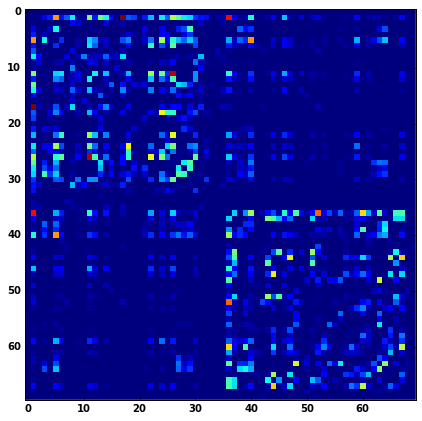

In [71]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

adj = nx.adj_matrix(g, nodelist=range(n_rois)).todense()
fig = plt.figure(figsize=(7,7))
p = plt.imshow(adj, interpolation='None')

### 3. Compute Summary Statistics

In [72]:
%%bash

ndmg_bids ../data/graph/ ../data/qc group

Parcellation: desikan
../data/qc/desikan
Computing: NNZ
Computing: Degree Seuqence
Computing: Edge Weight Sequence
Computing: Clustering Coefficient Sequence
Computing: Scan Statistic-1 Sequence
Computing: Eigen Value Sequence
Computing: Betweenness Centrality Sequence


### 4. Plot Summary Statistics

{u'date': u'Sun Oct 30 18:24:39 2016', u'subjects': [u'KKI2009_113_1_DTI_s3_desikan.gpickle']}


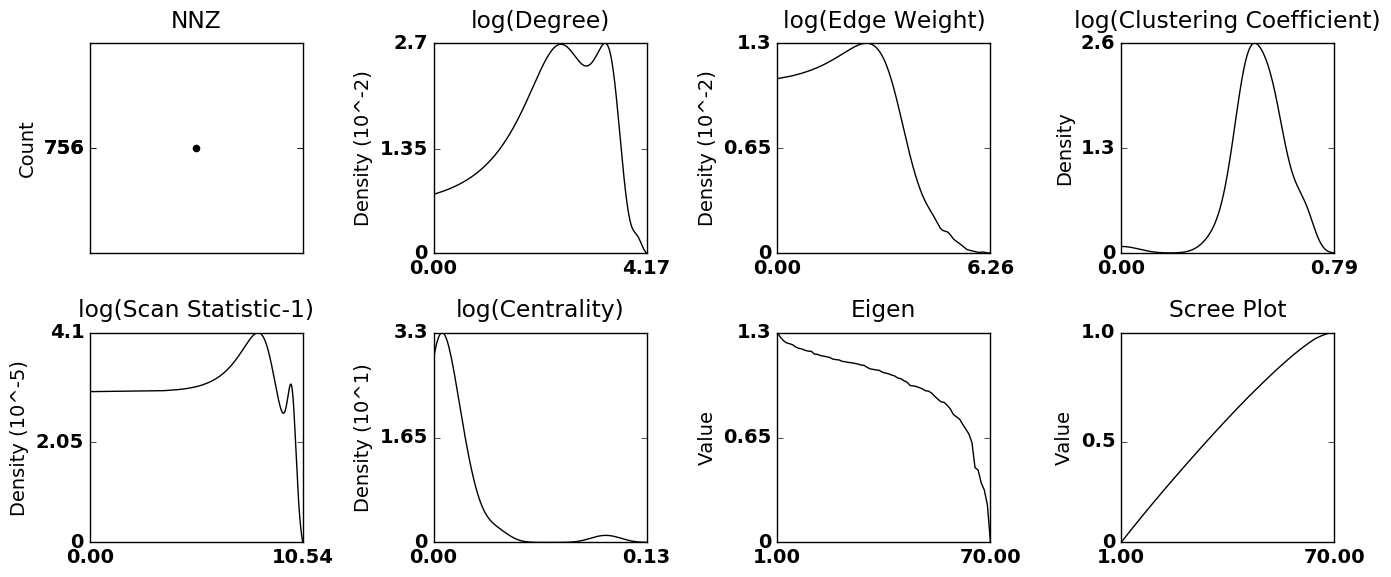

In [73]:
from IPython.display import Image
import json

with open('../data/qc/desikan/desikan_summary_info.json') as json_data:
    d = json.load(json_data)
    print(d)

Image(filename='../data/qc/desikan/desikan_summary.png')